<a href="https://colab.research.google.com/github/aayush-jain-dtu/inventory-stock-prediction/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set style for better visual appeal
sns.set_style("whitegrid")

In [ ]:
FILE_NAME = '/content/inventory_dataset (3) (1).csv'

In [ ]:
# Load the raw dataset and prepare the order_date column
df_raw = pd.read_csv(FILE_NAME)
df_raw['order_date'] = pd.to_datetime({'year': df_raw['order_year'],
                                        'month': df_raw['order_month'],
                                        'day': df_raw['order_day']})

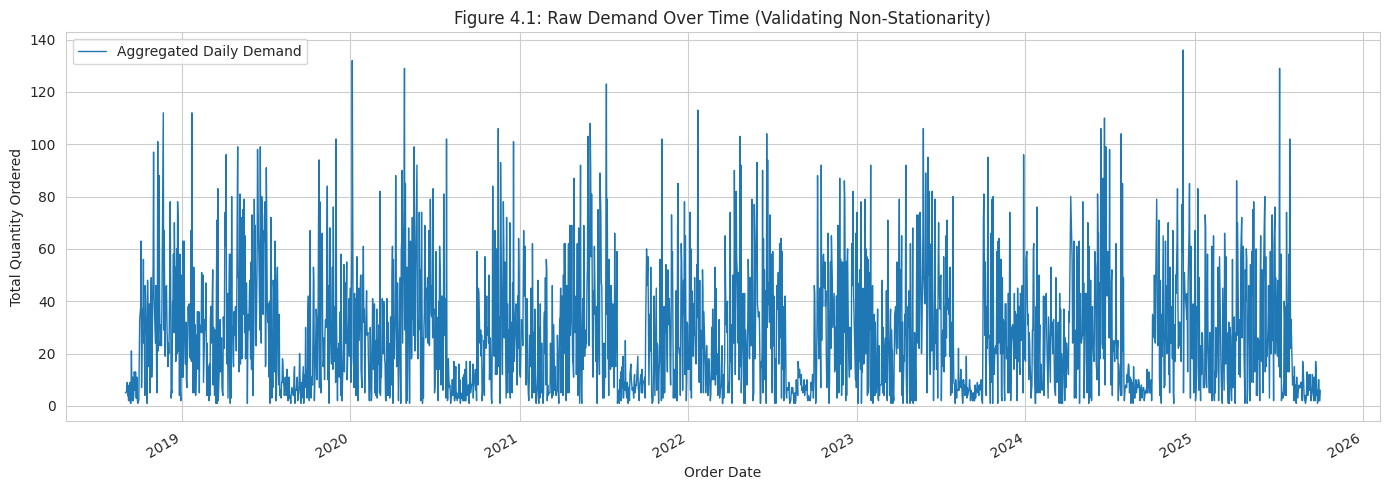

In [ ]:
# --- VISUALIZATION 1: Raw Time Series Plot (Validating Non-Stationarity) ---

# Aggregate total quantity ordered per day
daily_demand = df_raw.groupby('order_date')['quantity_ordered'].sum()

plt.figure(figsize=(14, 5))
daily_demand.plot(label='Aggregated Daily Demand', linewidth=1)
plt.title('Figure 4.1: Raw Demand Over Time (Validating Non-Stationarity)')
plt.xlabel('Order Date')
plt.ylabel('Total Quantity Ordered')
plt.legend()
plt.tight_layout()
plt.show()

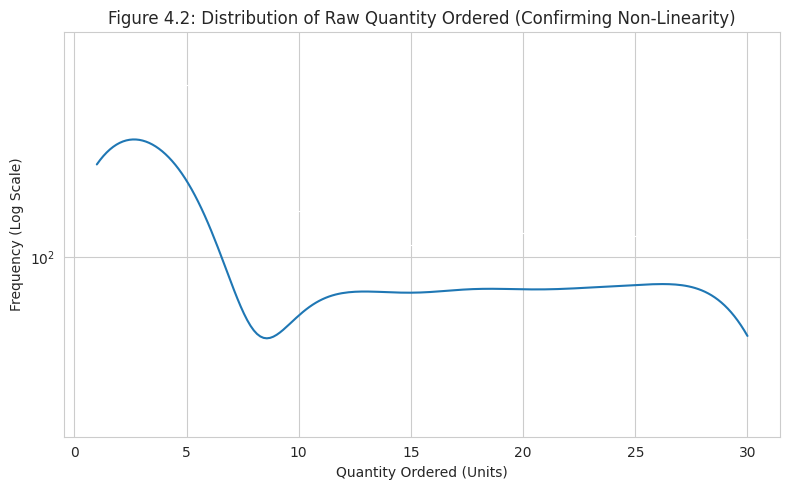

In [ ]:
# --- VISUALIZATION 2: Distribution Histogram (Validating Non-Normal Distribution) ---

plt.figure(figsize=(8, 5))
# Using Log scale on Y-axis helps visualize the long tail of low-frequency, high-magnitude sales spikes
sns.histplot(df_raw['quantity_ordered'], bins=50, kde=True, log_scale=(False, True))
plt.title('Figure 4.2: Distribution of Raw Quantity Ordered (Confirming Non-Linearity)')
plt.xlabel('Quantity Ordered (Units)')
plt.ylabel('Frequency (Log Scale)')
plt.tight_layout()
plt.show()

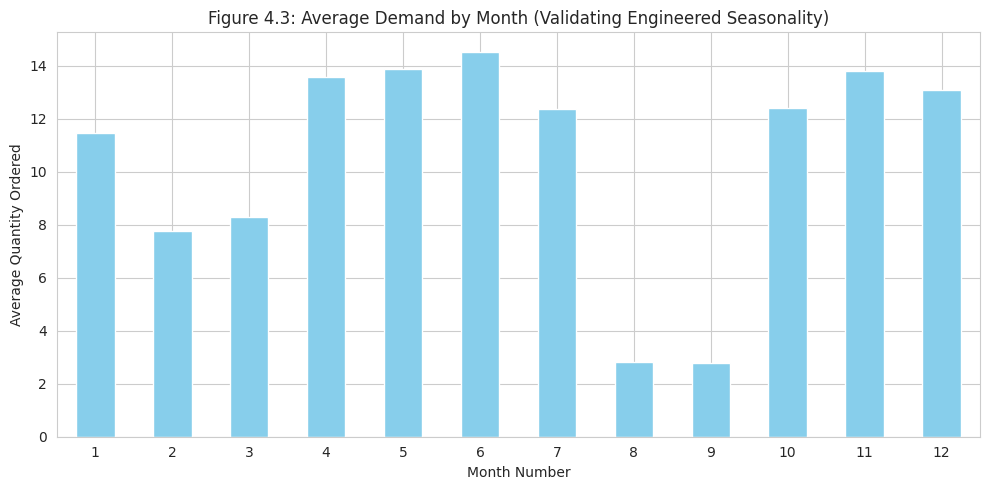

In [ ]:
# --- VISUALIZATION 3: Monthly Average Plot (Validating Cyclical Seasonality) ---

monthly_avg = df_raw.groupby('order_month')['quantity_ordered'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Figure 4.3: Average Demand by Month (Validating Engineered Seasonality)')
plt.xlabel('Month Number')
plt.ylabel('Average Quantity Ordered')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

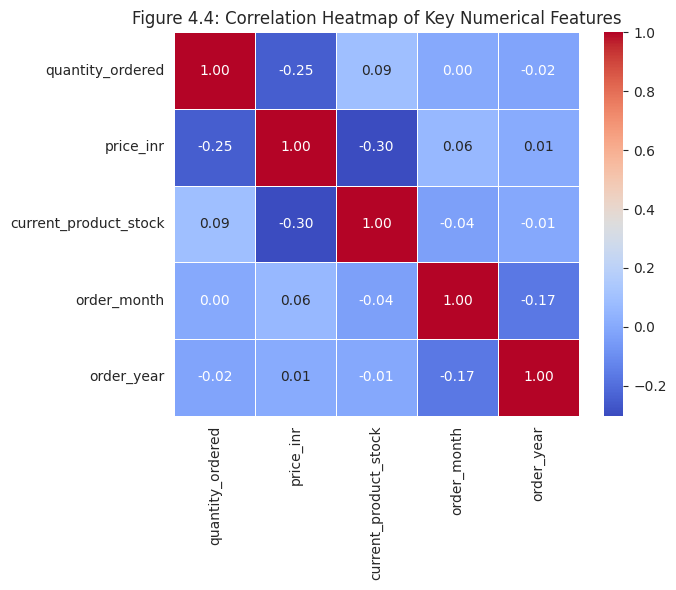

In [ ]:
# --- VISUALIZATION 4: Correlation Heatmap (Validating Multivariate Complexity) ---

# Select relevant numerical columns, including the time components for correlation check
corr_df = df_raw[['quantity_ordered', 'price_inr', 'current_product_stock', 'order_month', 'order_year']]

plt.figure(figsize=(7, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Figure 4.4: Correlation Heatmap of Key Numerical Features')
plt.tight_layout()
plt.show()